# 2026 Pre-Season Testing Comparison

**Session 0:** Bahrain Test  — Day 3 (2022)

**Session 1:** Bahrain Test 1 — Day 1 (Feb 11, 2026)

**Session 2:** Bahrain Test 1 — Day 2 (Feb 12, 2026)

**Session 3:** Bahrain Test 1 — Day 3 (Feb 13, 2026)

**Session 4:** Bahrain Test 2 — Day 1 (Feb 18, 2026)

**Session 5:** Bahrain Test 2 — Day 2 (Feb 19, 2026)

**Session 6:** Bahrain Test 2 — Day 3 (Feb 20, 2026)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import fastf1
import fastf1.plotting
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
from fastf1 import utils
from fastf1.utils import delta_time
import matplotlib.colors as mcolors
from matplotlib.collections import LineCollection
import matplotlib as mpl
from typing import Union
from matplotlib.colors import LinearSegmentedColormap
import warnings
import f1analytics as f1a
warnings.filterwarnings('ignore')

In [2]:
# Setup plotting
fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme='fastf1')

# Load Bahrain Test 2022, Day 3
session0 = fastf1.get_testing_session(2022, 2, 3)
session0.load()

# Load Bahrain Test 1, Day 1
session1 = fastf1.get_testing_session(2026, 1, 1)
session1.load()

# Load Bahrain Test 1, Day 2
session2 = fastf1.get_testing_session(2026, 1, 2)
session2.load()

# Load Bahrain Test 1, Day 3
session3 = fastf1.get_testing_session(2026, 1, 3)
session3.load()

# Load Bahrain Test 2, Day 1
session4 = fastf1.get_testing_session(2026, 2, 1)
session4.load()

# Load Bahrain Test 2, Day 2 
session5 = fastf1.get_testing_session(2026, 2, 2)
session5.load()

# Load Bahrain Test 2, Day 3 
session6 = fastf1.get_testing_session(2026, 2, 3)
session6.load()

req         WARNING 	DEFAULT CACHE ENABLED! (4.11 GB) /Users/PietroPaolo/Library/Caches/fastf1
core           INFO 	Loading data for Pre-Season Test - Practice 3 [v3.8.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Fixed incorrect tyre stint information for driver '1'
core        WARNING 	No lap data for driver 3
core        WARNING 	No lap data for driver 31
core        WARNING 	Fixed incorrect tyre stint information for driver '47'
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 3)
core        WARNING 	Failed to perform lap accuracy check - all laps marked as

In [3]:
session_name='Pre-Season Testing 2022 vs 2026'
session_year='2022 & 2026'
session_type=''

## Cross-Session Telemetry Comparison

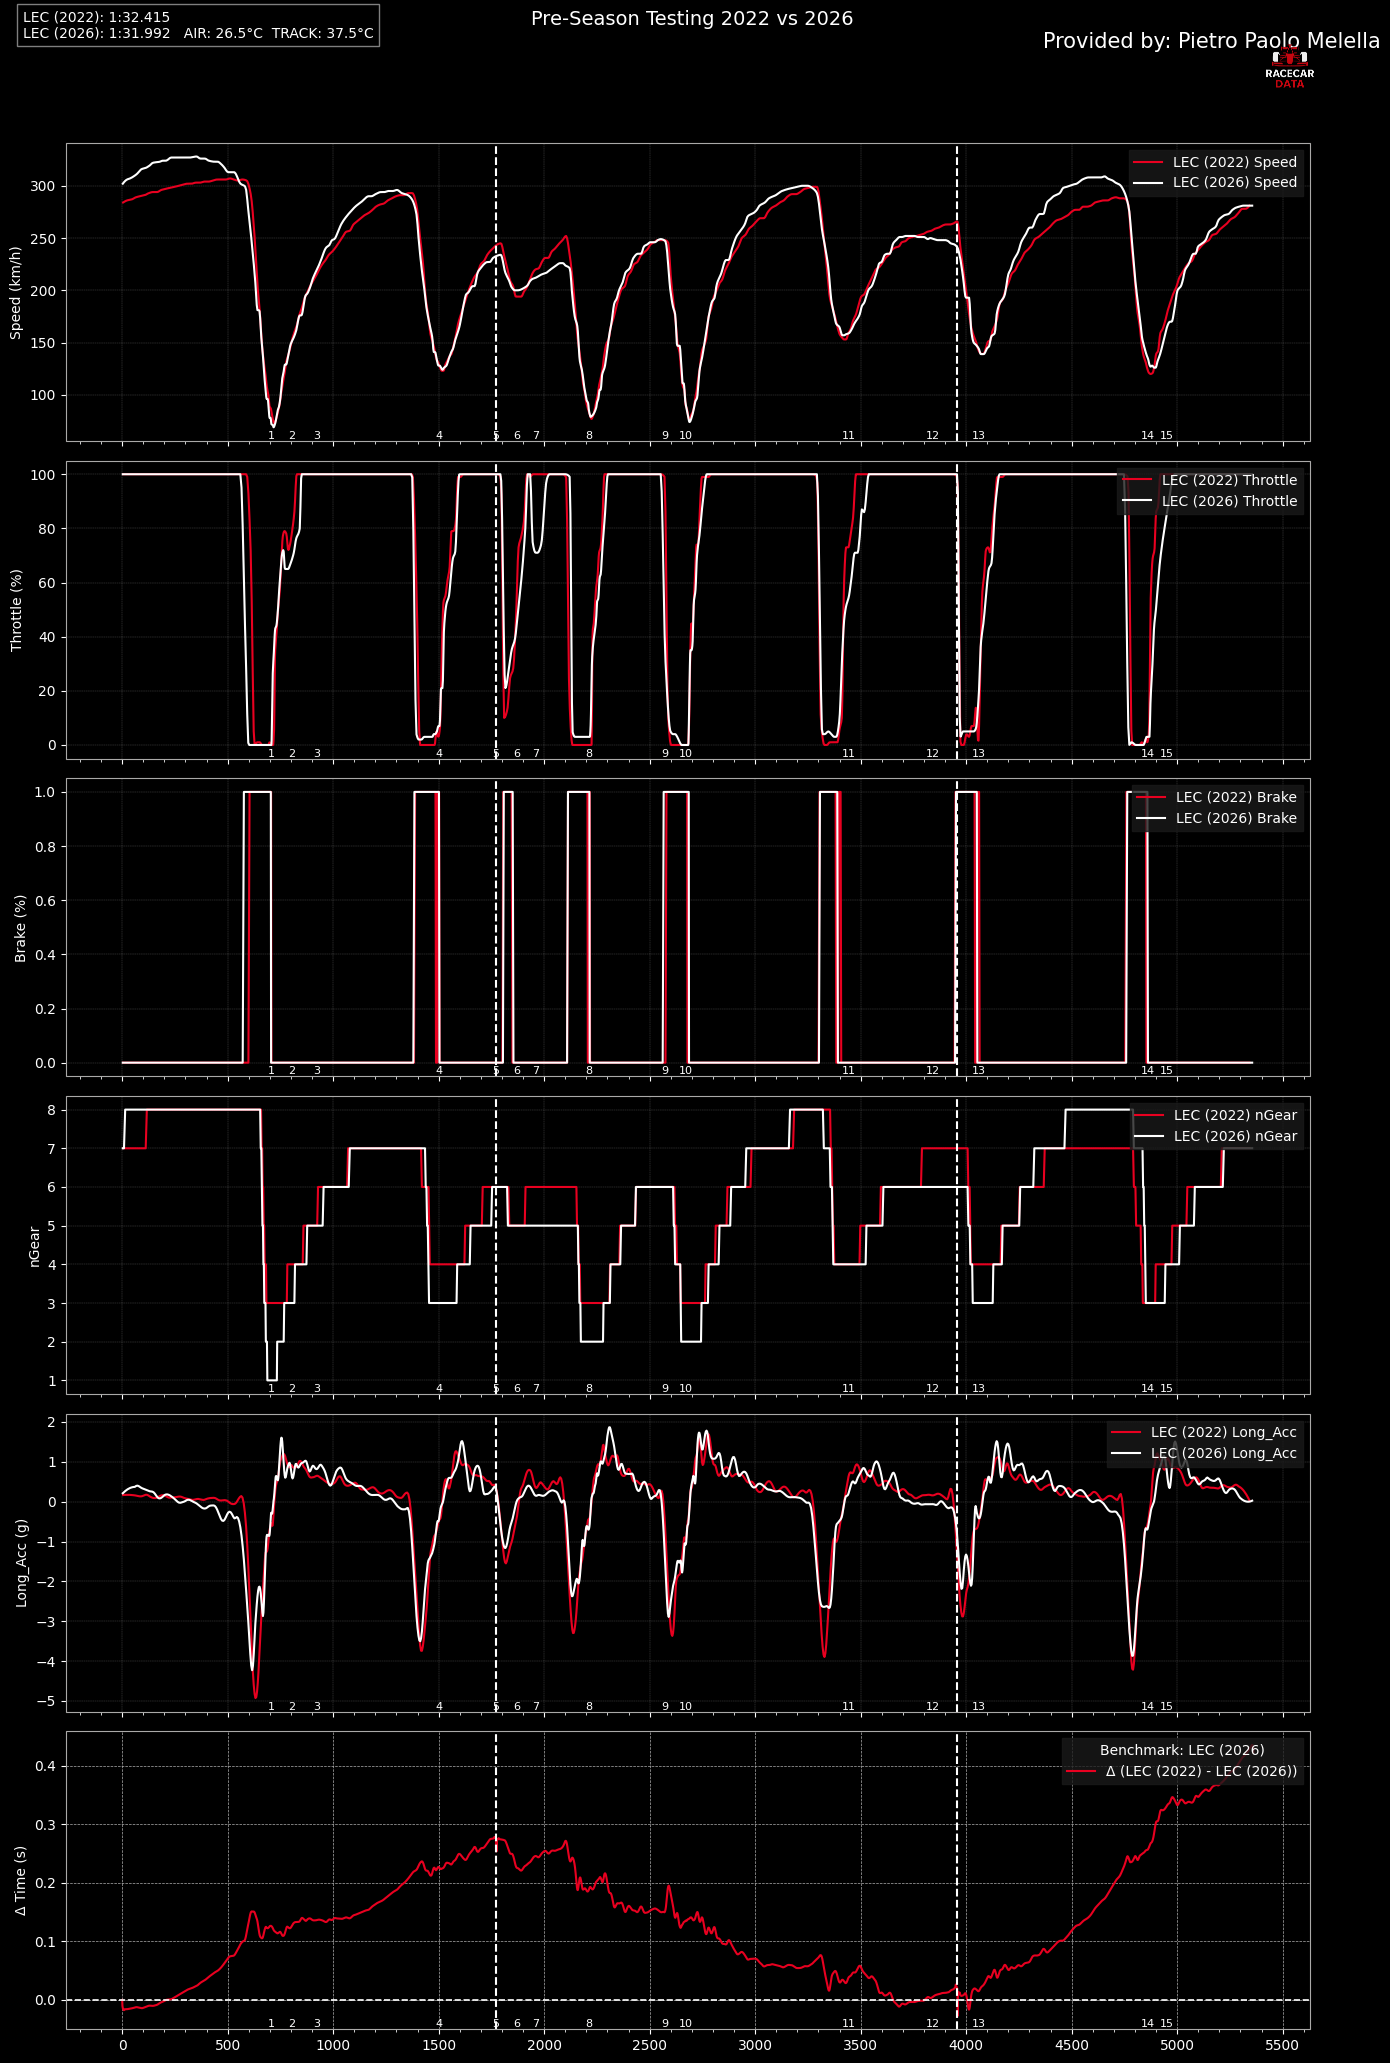

In [4]:
# from f1analytics.telemetry import Telemetry

# Create the analyzer (no session needed in cross-session mode)
tel = f1a.Telemetry(
    session_name=session_name,
    year='',
    session_type="Testing",
)

# Compare a driver across two sessions
fig, axes = tel.compare_laps(
    laps=[
        (session0, 'LEC', 'fastest', '2022'),
        (session6, 'LEC', 'fastest', '2026'),
    ],
    channels=['Speed', 'Throttle', 'Brake', 'nGear','Long_Acc' , 'delta'],
)
plt.show()


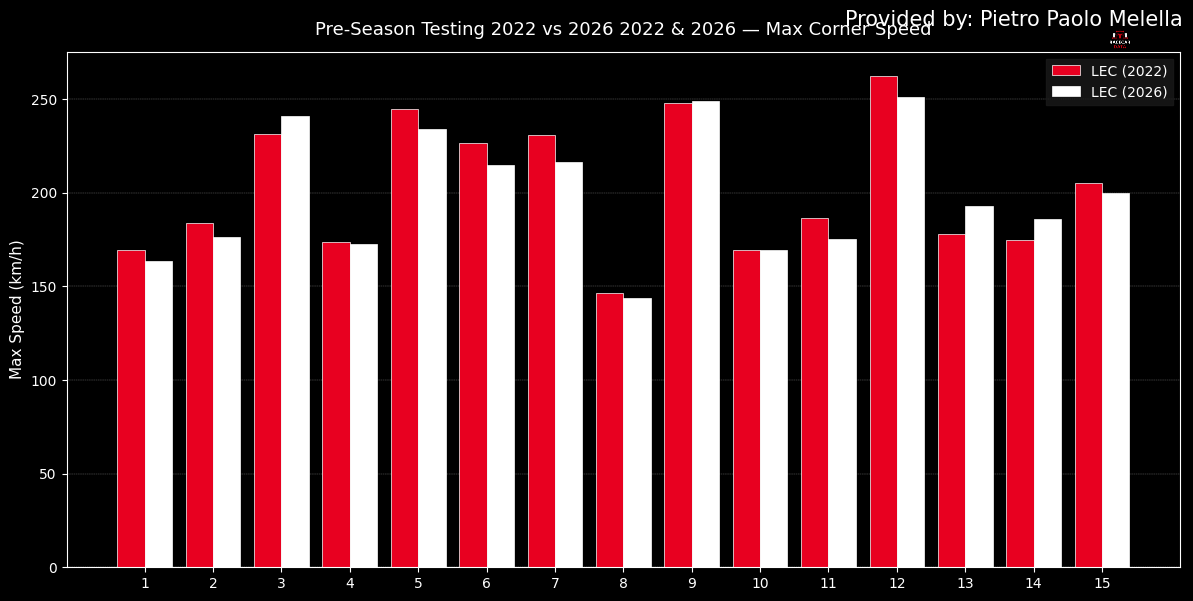

In [5]:
csc = f1a.CornerSpeedComparator(
    session_name=session_name,
    year=session_year,
    session_type=session_type,
    laps=[
        (session0, 'LEC', 'fastest', '2022'),
        (session6, 'LEC', 'fastest', '2026'),
    ],
    mode='max'
).plot_peak_speeds()

(<Figure size 1600x700 with 2 Axes>,
 <Axes: title={'center': 'Corner Time Deltas — Pre-Season Test 2022 vs 2026 — Testing — fastest per corner\nLEC (2022): 1:32.415  |  LEC (2026): 1:31.992'}, xlabel='Turn', ylabel='Time Lost (s)'>)

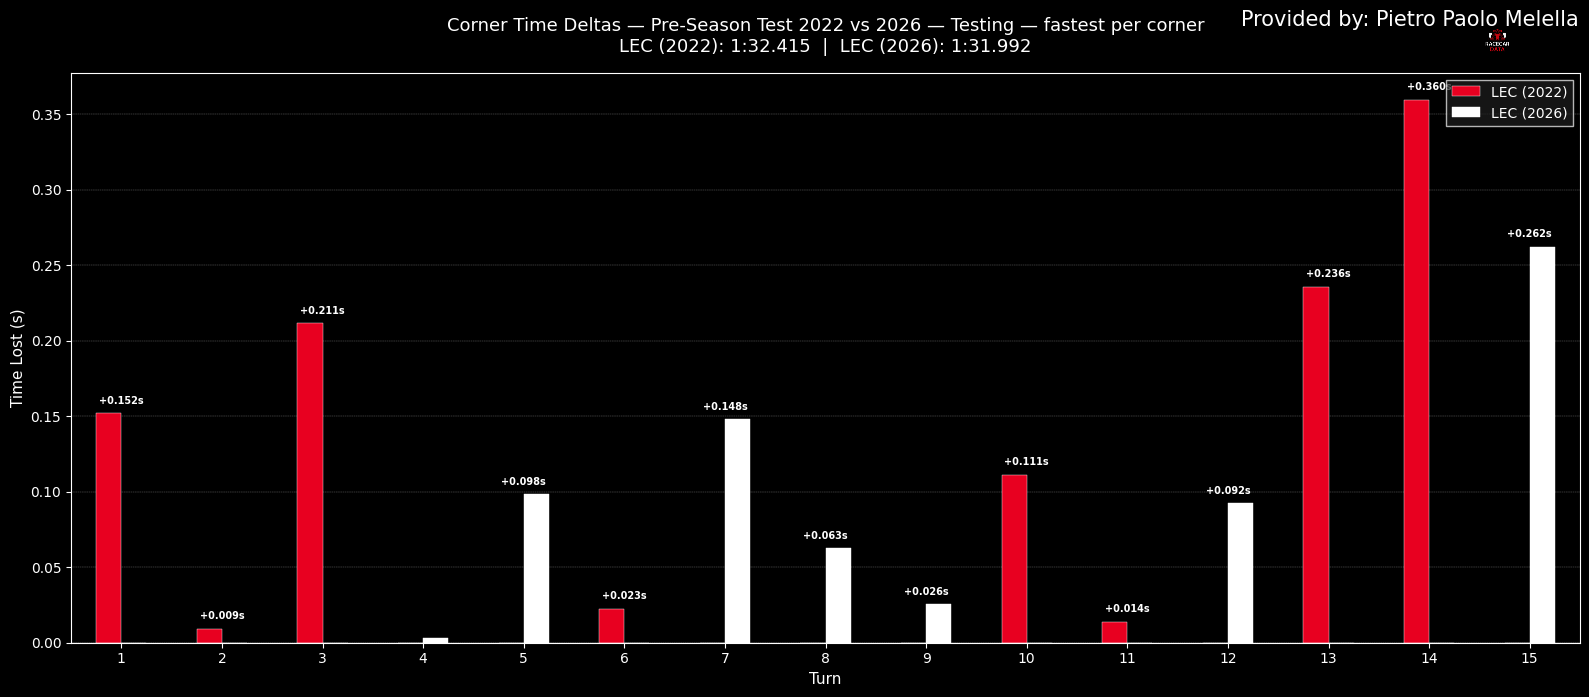

In [6]:
cmp = f1a.CornerTimeComparator(
    session_name="Bahrain Pre-Season",
    year='2022 vs 2026',
    session_type="Testing",
    laps=[
        (session0, 'LEC', 'fastest', '2022'),
        (session6, 'LEC', 'fastest', '2026'),
    ],
)

cmp.plot_corner_time_deltas(baseline='per_corner_fastest')


(<Figure size 1400x1000 with 3 Axes>,
 <Axes: title={'center': 'Bahrain Pre-Season 2022 vs 2026 — LEC vs LEC'}>)

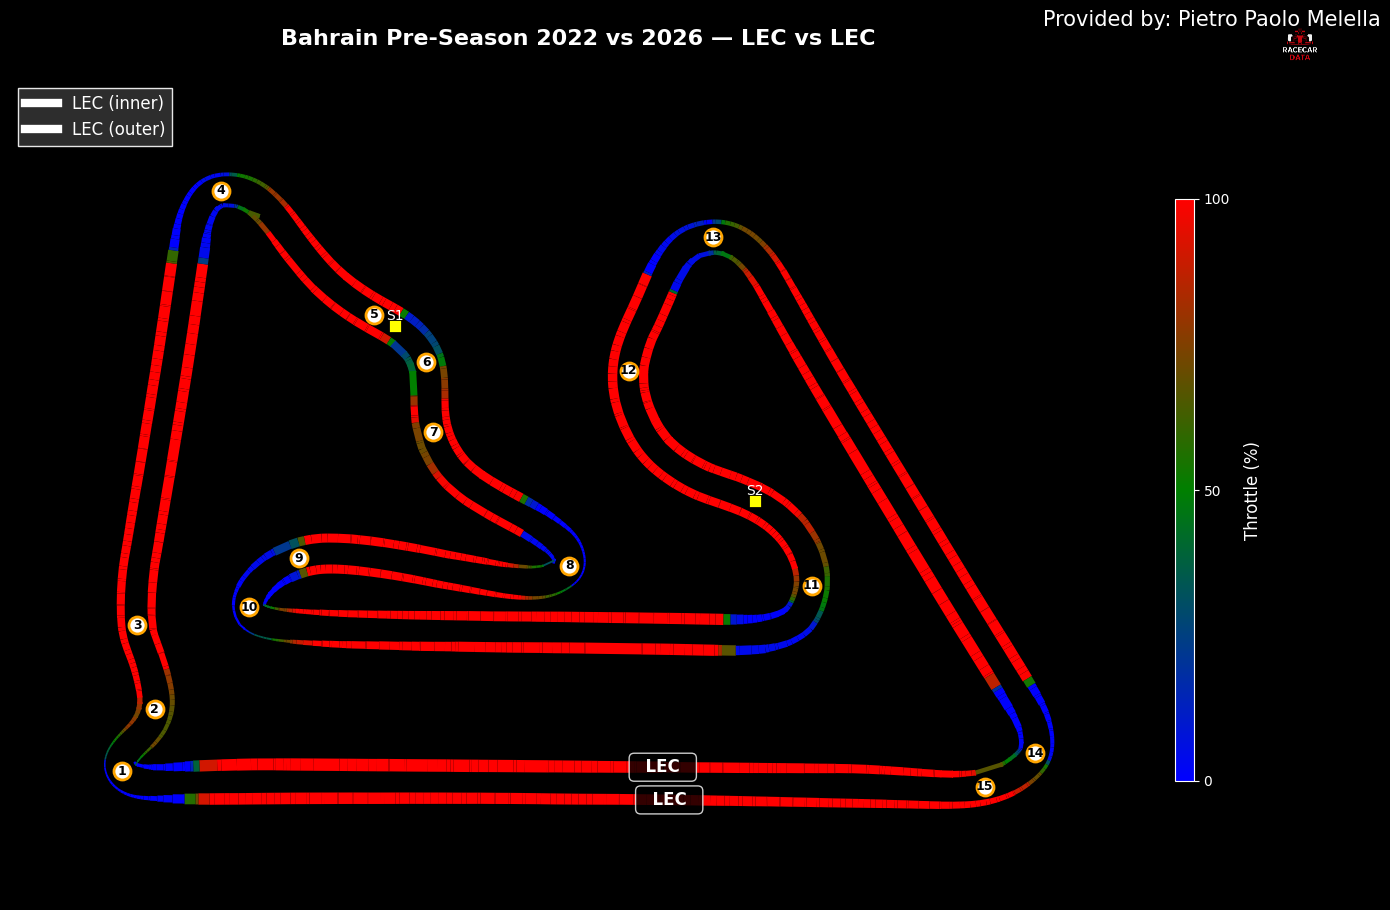

In [7]:
vis = f1a.DualThrottleComparisonVisualizer(
    reference_driver='LEC',
    reference_session=session6,        
    comparison_driver='LEC',
    comparison_session=session0,       
    offset_distance=200,
    event_name="Bahrain Pre-Season",
    year='',
    session_name="2022 vs 2026",
    annotate_sectors=True,
)
vis.plot()


(<Figure size 1600x700 with 2 Axes>,
 <Axes: title={'center': 'Bahrain Pre-Season 2022 vs 2026 — Testing — Minisector Deltas\nLEC (2022): 1:32.415  |  LEC (2026): 1:31.992'}, xlabel='Mini-sector', ylabel='Time Lost (s)'>)

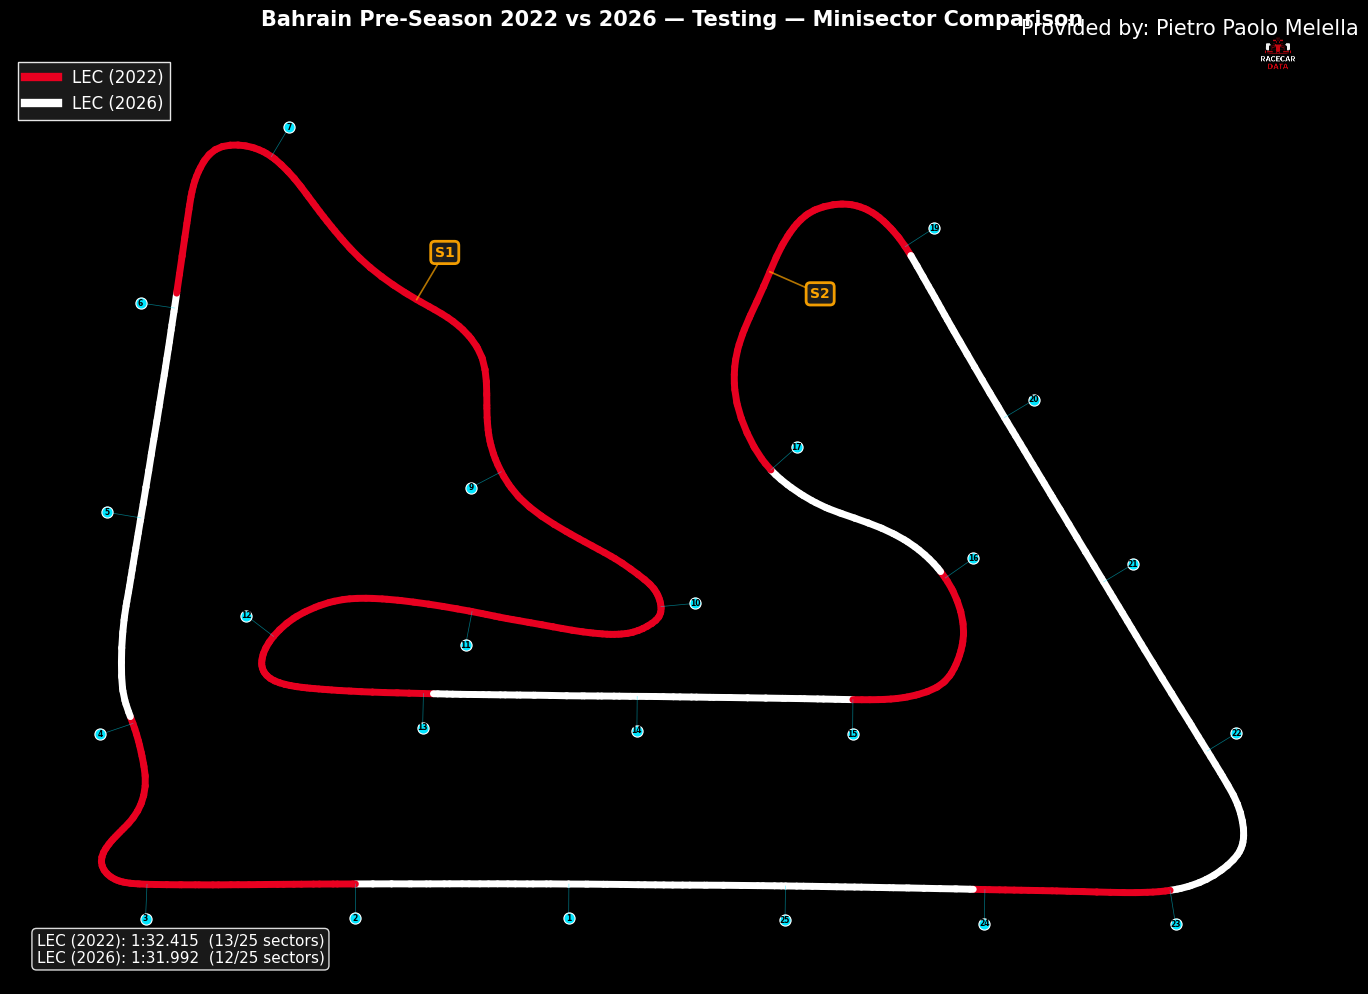

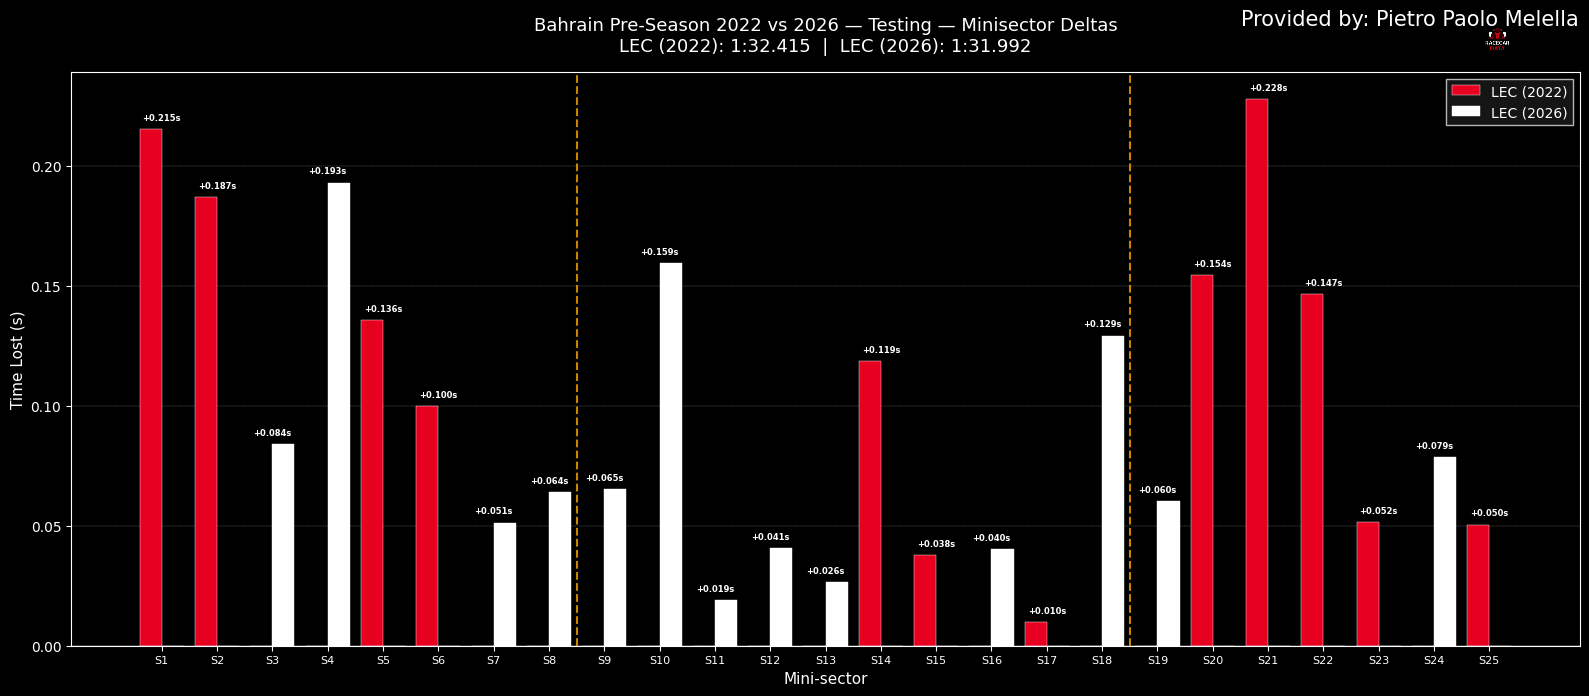

In [8]:
# from f1analytics.minisector import MinisectorComparator

ms = f1a.MinisectorComparator(
    session_name="Bahrain Pre-Season",
    year='2022 vs 2026',
    session_type="Testing",
    laps=[
        (session0, 'LEC', 'fastest', '2022'),
        (session6, 'LEC', 'fastest', '2026'),
    ],
    n_sectors=25,
)
ms.plot_track_map()
ms.plot_bar_chart()
